In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# load the weather date from NOAA
df = pd.read_csv('data/NOAA_weather_data.csv')
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT22,WT22_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2012-01-01,0.05,",,X,2400",0.0,",,X,",...,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2012-01-02,0.00,",,X,2400",0.0,",,X,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2012-01-03,0.00,",,X,2400",0.0,",,X,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2012-01-04,0.00,",,X,2400",0.0,",,X,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2012-01-05,0.00,",,X,2400",0.0,",,X,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP',
       'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES',
       'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES', 'TSUN', 'TSUN_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES',
       'WT02', 'WT02_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
       'WT04_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES', 'WT08', 'WT08_ATTRIBUTES',
       'WT11', 'WT11_ATTRIBUTES', 'WT13', 'WT13_ATTRIBUTES', 'WT14',
       'WT14_ATTRIBUTES', 'WT16', 'WT16_ATTRIBUTES', 'WT18', 'WT18_ATTRIBUTES',
       'WT19', 'WT19_ATTRIBUTES', 'WT22', 'WT22_ATTRIBUTES'],
      dtype='object')

In [6]:
central_park = df[['DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']]

In [7]:
central_park.rename(columns={'DATE':'date', 
                             'PRCP':'precipitation', 
                             'SNOW':'snow_fall', 
                             'SNWD':'snow_accum', 
                             'TMAX':'max_temp', 
                             'TMIN':'min_temp'},
                    inplace=True)

/Users/kevinc/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [8]:
central_park.isnull().sum()

date             0
precipitation    0
snow_fall        0
snow_accum       0
max_temp         0
min_temp         0
dtype: int64

In [9]:
central_park.dtypes

date              object
precipitation    float64
snow_fall        float64
snow_accum       float64
max_temp           int64
min_temp           int64
dtype: object

In [10]:
# set date to datetime dtype
central_park['date'] = pd.to_datetime(central_park.date)

/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
# make sure the dataframe is in chronological order
# by sorting by date and resetting the index
central_park.sort_values('date', inplace=True)
central_park.reset_index(inplace=True)
print(min(central_park.date))
print(max(central_park.date))

2012-01-01 00:00:00
2019-04-22 00:00:00


/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# look at stats for all of the columns
central_park.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
index,2669,NaN,NaN,NaN,NaN,NaN,1334,770.618,0,667,1334,2001,2668
date,2669,2669,2016-11-14 00:00:00,1,2012-01-01 00:00:00,2019-04-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precipitation,2669,NaN,NaN,NaN,NaN,NaN,0.129723,0.351991,0,0,0,0.06,4.97
snow_fall,2669,NaN,NaN,NaN,NaN,NaN,0.0984264,0.854017,0,0,0,0,27.3
snow_accum,2669,NaN,NaN,NaN,NaN,NaN,0.438142,2.0175,0,0,0,0,22
max_temp,2669,NaN,NaN,NaN,NaN,NaN,62.6568,18.3762,13,47,64,79,100
min_temp,2669,NaN,NaN,NaN,NaN,NaN,48.5152,17.0168,-1,35,48,64,83


/Users/kevinc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Degrees (F)')

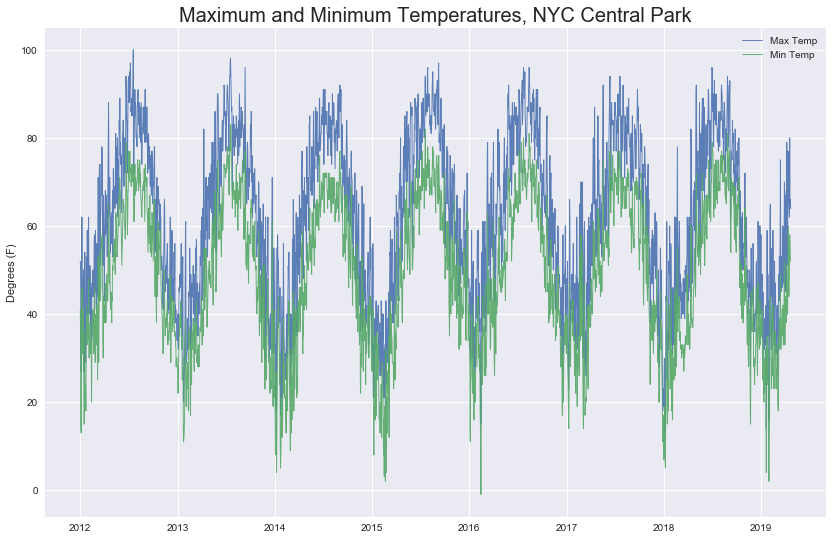

In [13]:
# plot max and min temperatures
plt.figure(figsize=(14, 9))
plt.plot(central_park.date, central_park.max_temp, lw=0.95, label='Max Temp', alpha=0.9)
plt.plot(central_park.date, central_park.min_temp, lw=0.95, label='Min Temp', alpha=0.9)
plt.legend()
plt.title('Maximum and Minimum Temperatures, NYC Central Park', fontsize=20)
plt.ylabel('Degrees (F)')

In [27]:
central_park['hot_day'] = (central_park.max_temp > 85).astype(int)

/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Degrees (F)')

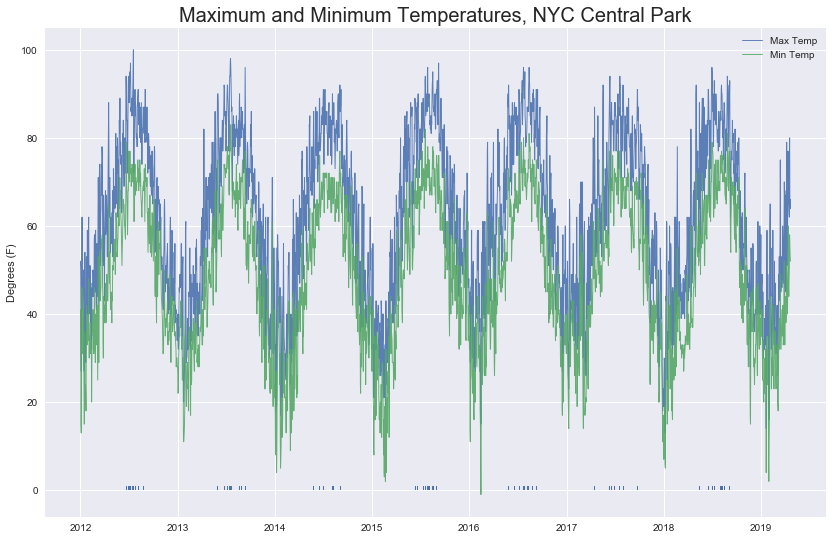

In [50]:
# plot max and min temperatures
plt.figure(figsize=(14, 9))
plt.plot(central_park.date, central_park.max_temp, lw=0.95, label='Max Temp', alpha=0.9)
plt.plot(central_park.date, central_park.min_temp, lw=0.95, label='Min Temp', alpha=0.9)
plt.legend()
plt.title('Maximum and Minimum Temperatures, NYC Central Park', fontsize=20)
plt.ylabel('Degrees (F)')

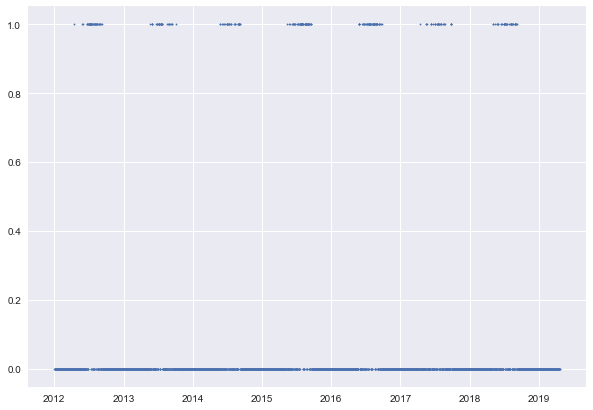

In [56]:
plt.figure(figsize=(10,7))
plt.scatter(central_park.date, central_park.hot_day, s=2)

In [22]:
central_park.to_csv('data/central_park_temp_precip.csv', index=False)

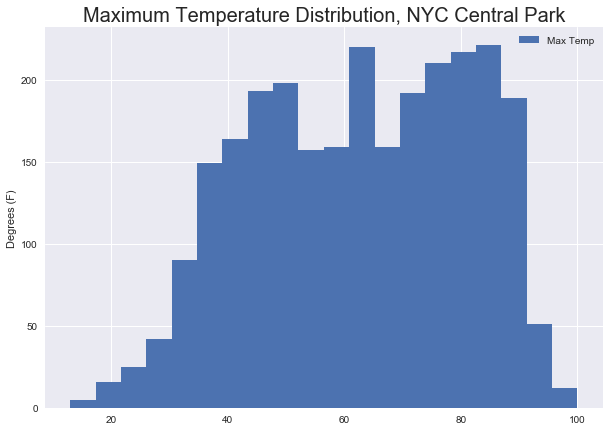

In [14]:
plt.figure(figsize=(10, 7))
plt.hist(central_park.max_temp, label='Max Temp', bins=20)
plt.legend()
plt.title('Maximum Temperature Distribution, NYC Central Park', fontsize=20)
plt.ylabel('Degrees (F)');

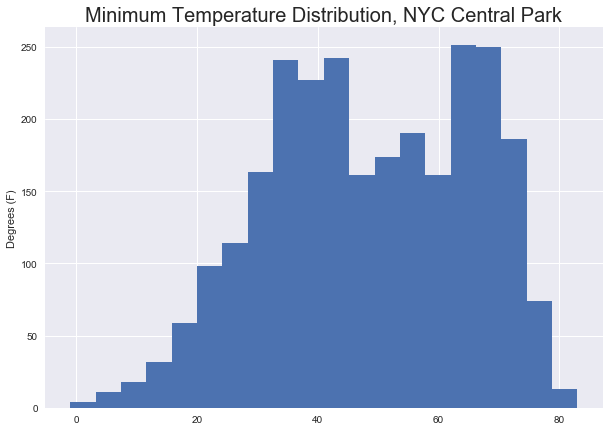

In [15]:
plt.figure(figsize=(10, 7))
plt.hist(central_park.min_temp, bins=20)
plt.title('Minimum Temperature Distribution, NYC Central Park', fontsize=20)
plt.ylabel('Degrees (F)');

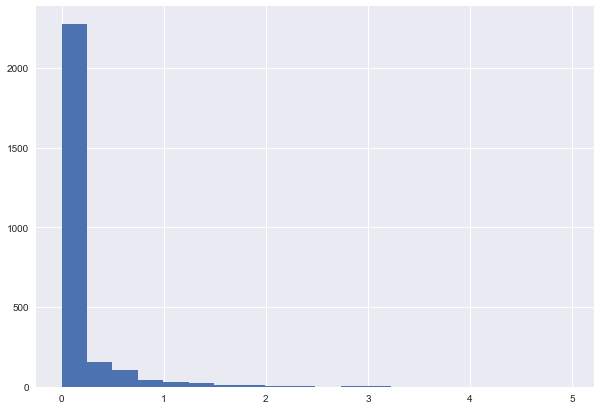

In [16]:
plt.figure(figsize=(10, 7))
plt.hist(central_park.precipitation, bins=20);

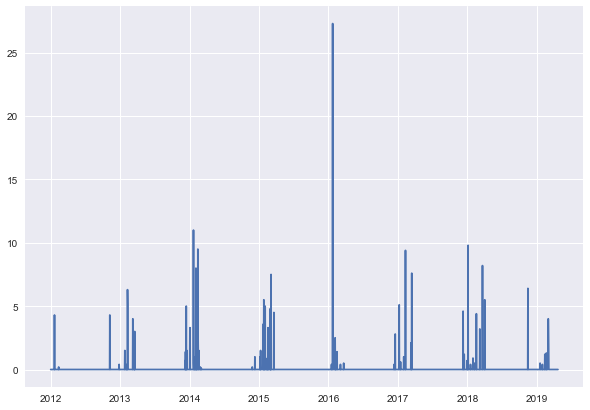

In [17]:
plt.figure(figsize=(10,7))
plt.plot(central_park.date, central_park.snow_fall)

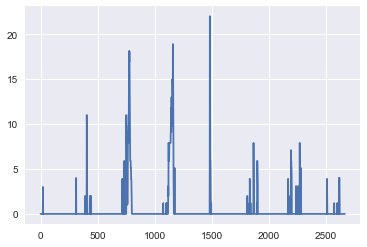

In [19]:
plt.plot(central_park.snow_accum)